GRIP : The Sparks Foundation
----
#GRIPDECEMBER22

__Name: Amritha Prakash__

Data Science and Business Intelligence Internship


__Task 3 - Exploratory Data Analysis - Retail__


Task -  

Perform 'Exploratory Data Analysis' on data set ' SampleSuperstore'  
As a business manager, try to find out the weak areas where you can work to make more profit.  
what all business problems you can derive by exploring the data?  
Data set - https://bit.ly/3i4rbWl  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
SampleSuperstore_data= pd.read_csv("SampleSuperstore.csv")


In [3]:
# Understanding the Data
SampleSuperstore_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
SampleSuperstore_data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
SampleSuperstore_data.describe()
# only integer value are impacted with describe

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
SampleSuperstore_data.shape
# have 9994 rows and 13 columns

(9994, 13)

In [7]:
#Data cleaning
SampleSuperstore_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
SampleSuperstore_data.duplicated().sum()

17

In [9]:
# since we have 17 duplicate values we can drop them
SampleSuperstore_data=SampleSuperstore_data.drop_duplicates()

In [10]:
SampleSuperstore_data.shape

(9977, 13)

In [11]:
SampleSuperstore_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
# check for unique values in each column
SampleSuperstore_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
#Unique Values of each Column -
for col in SampleSuperstore_data[:]:
    print(col,":",SampleSuperstore_data[col].unique())
    print("-"*100)

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
----------------------------------------------------------------------------------------------------
Segment : ['Consumer' 'Corporate' 'Home Office']
----------------------------------------------------------------------------------------------------
Country : ['United States']
----------------------------------------------------------------------------------------------------
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasaden

In [14]:
# Since the country is United States, we can drop that column as it says entire data is of US.
SampleSuperstore_data= SampleSuperstore_data.drop(columns="Country")

In [15]:
# Since postal code indirectly speaks about State, City in which the data is, we can drop it too
SampleSuperstore_data= SampleSuperstore_data.drop(columns="Postal Code")

In [16]:
SampleSuperstore_data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [17]:
# EDA - helps to understand the relation btw variables which gives perspective over data.
SampleSuperstore_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


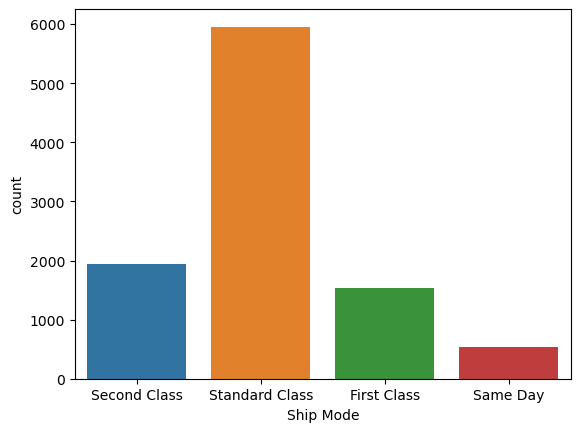

In [18]:
#Univariate analysis
sns.countplot(x='Ship Mode',data=SampleSuperstore_data)
plt.show()
# Insight - Standard Class mode has been Sold majorly, while least being the ones on Same Day

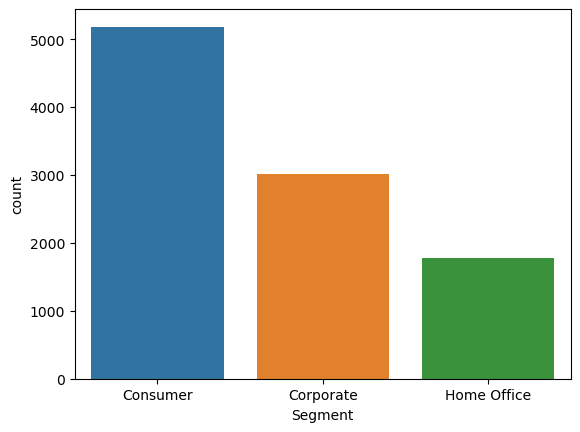

In [19]:
sns.countplot(x='Segment',data=SampleSuperstore_data)
plt.show()
# Insight - Consumer Segment are the ones who buy most

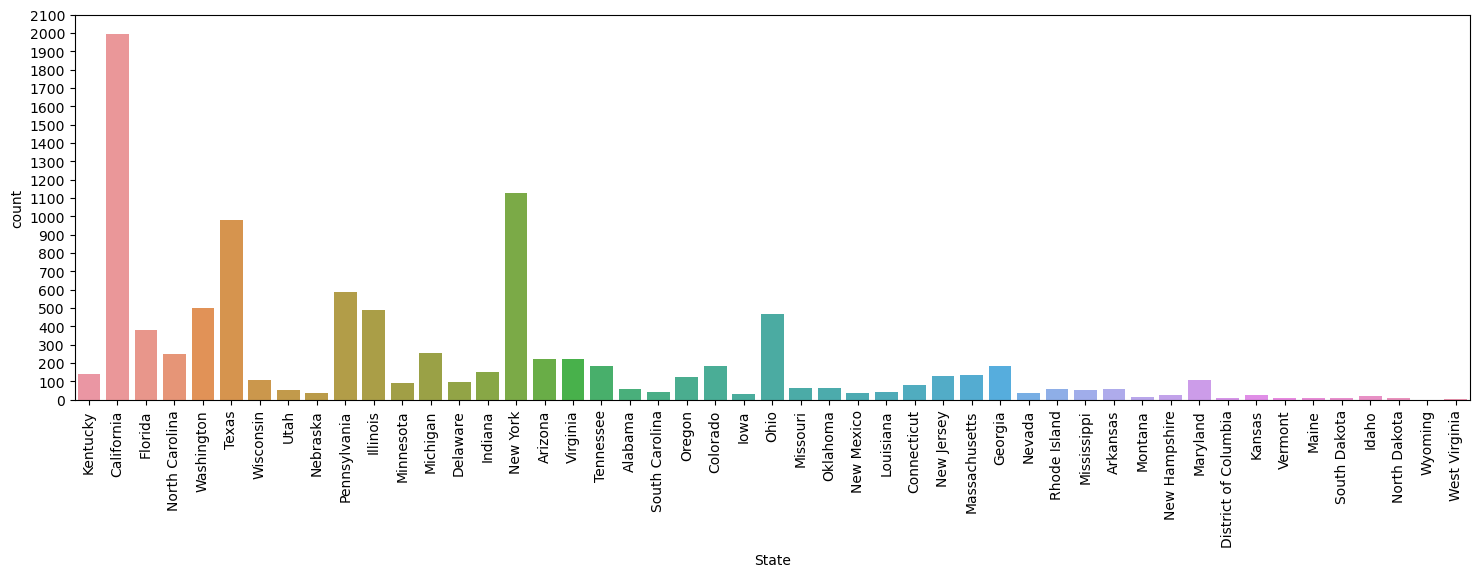

In [20]:
plt.figure(figsize=[18,5])
sns.countplot(x='State',data=SampleSuperstore_data)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()

In [21]:
SampleSuperstore_data_state=SampleSuperstore_data['State'].value_counts()
SampleSuperstore_data_state
# Insight - Each State has various count on products, with California having the highest(1996) and Wyoming with least(1)

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

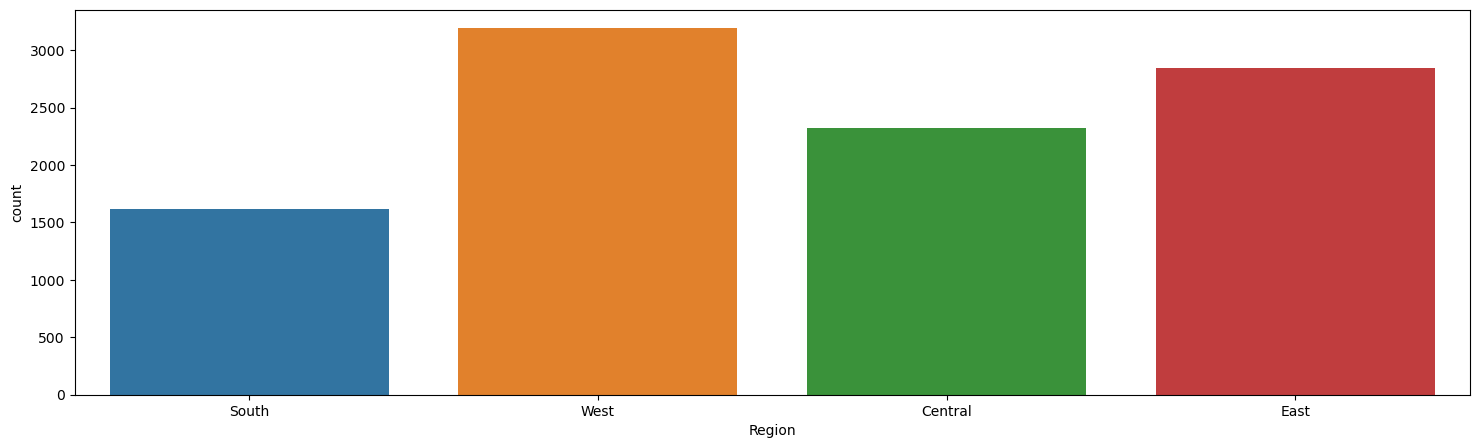

In [22]:
plt.figure(figsize=[18,5])
sns.countplot(x='Region',data=SampleSuperstore_data)
plt.show()
# Insight - Each Region has various count on products, with West Region having the highest and South with least

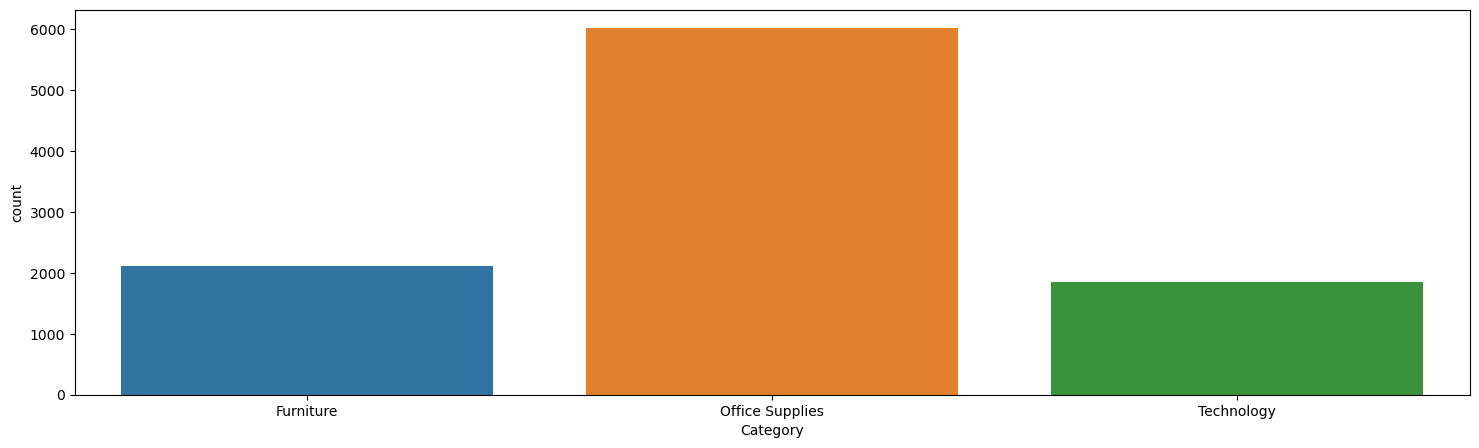

In [23]:
plt.figure(figsize=[18,5])
sns.countplot(x='Category',data=SampleSuperstore_data)
plt.show()
# Insight - Each Category has various count on products, with Office Supplies having the highest and Technology with least

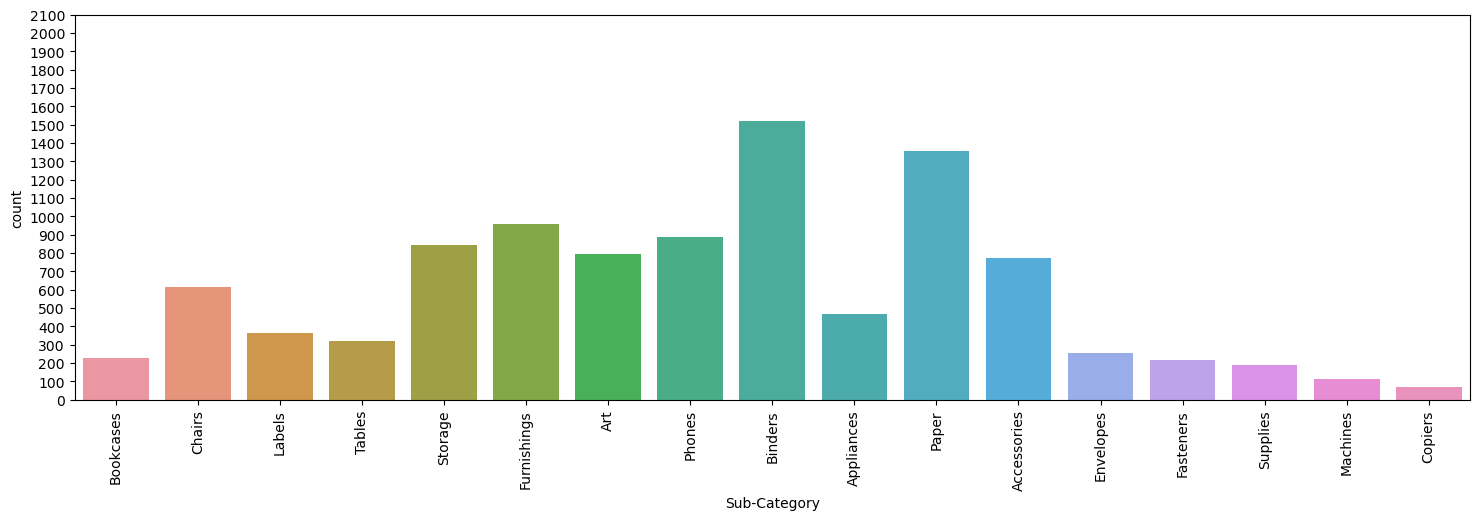

In [24]:
plt.figure(figsize=[18,5])
sns.countplot(x='Sub-Category',data=SampleSuperstore_data)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()
# Insight - Each Sub-Category has various count on products, with Blinders followed by Paper

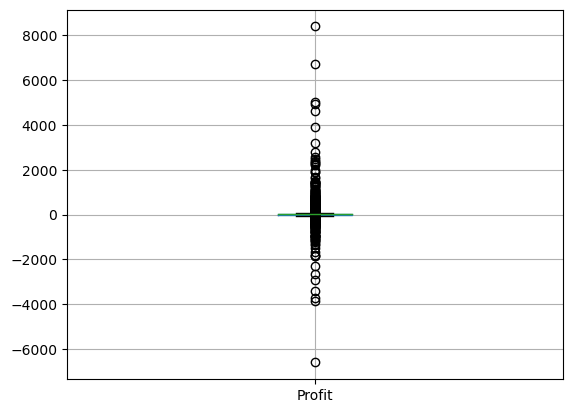

Value of Skewness: 7.554748459862763


In [25]:
SampleSuperstore_data.boxplot(column=['Profit'])
plt.show()
print("Value of Skewness:",SampleSuperstore_data['Profit'].skew())
# insight - Profit is very much skewed, with many outliers
# usually skewness lies between -1 to +1. Our data is heavily skewed in right direction

__#Analysis -__

In [26]:
# Relationship Analysis = wider perspective on data, each features relation with each other feature
correlation=SampleSuperstore_data.corr(method="pearson")

<AxesSubplot:>

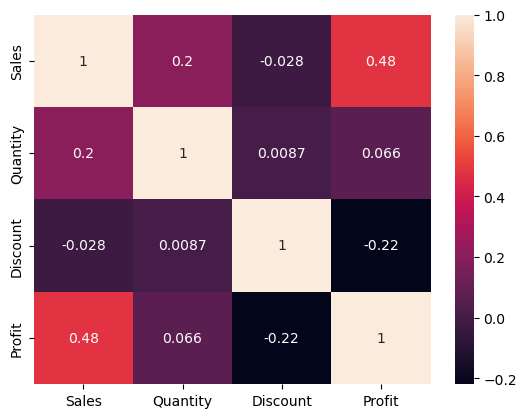

In [27]:
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
# variability between integer feature can be observed, 
#1.Profit and sales have very slight positive relation
#2. while Discount and Profit have negative relation.Similarly with Discount and Sales, they have negative relation. 


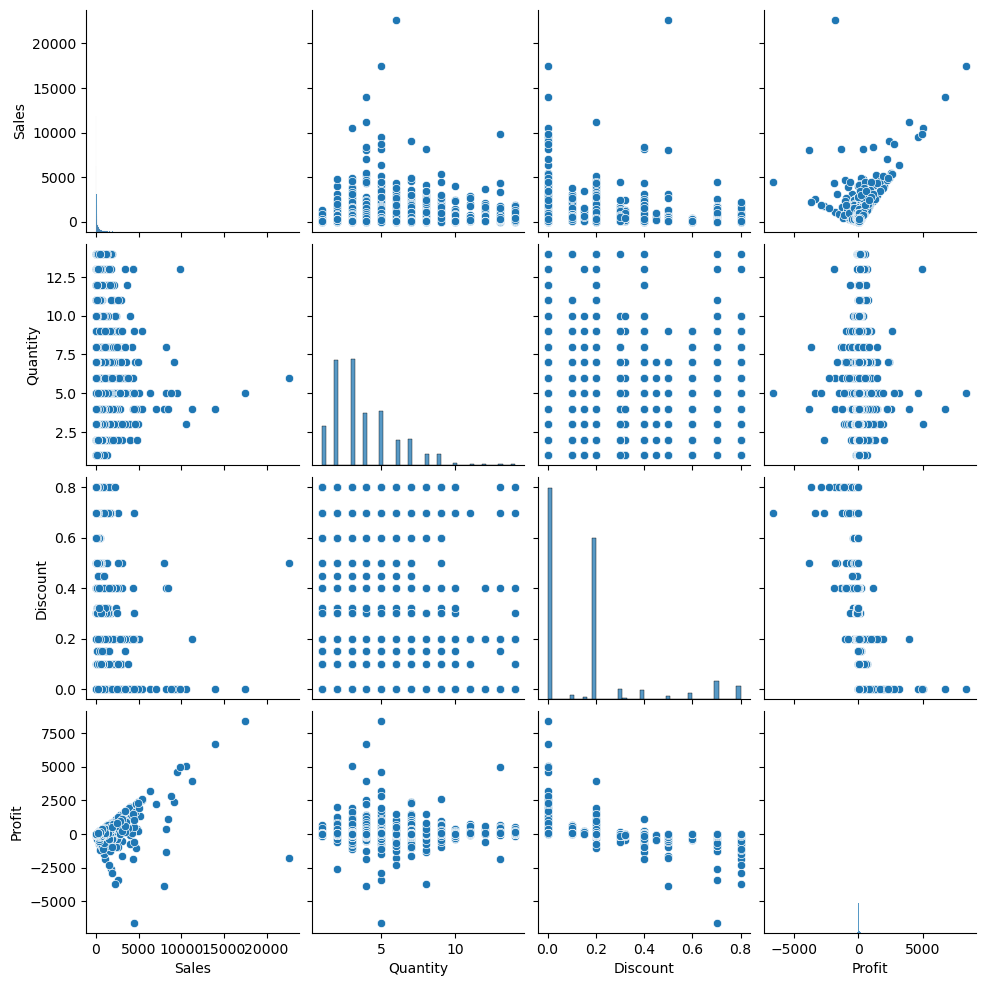

In [28]:
sns.pairplot(SampleSuperstore_data)
plt.show()
# From pair plot too not much decisive. 

In [29]:
# Analysis associated with Profit, Discount and Sales -
# with respect to Ship Mode
SampleSuperstore_data_ship=SampleSuperstore_data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
SampleSuperstore_data_ship


,Sales,Discount,Profit
Ship Mode,,,
First Class,228.614490,0.164587,31.850134
Same Day,236.755950,0.152675,29.283924
Second Class,236.323750,0.138626,29.565956
Standard Class,227.928858,0.160222,27.534715


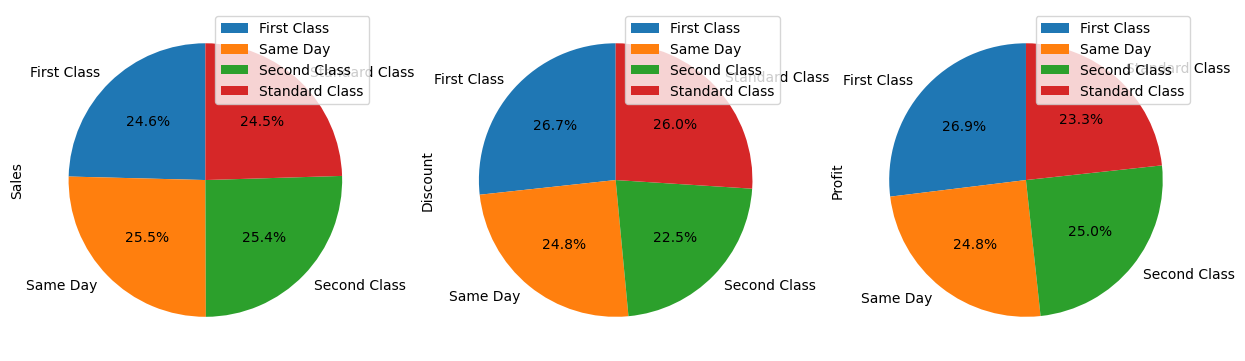

In [30]:
SampleSuperstore_data_ship.plot.pie(subplots=True,figsize=(15,20),autopct="%1.1f%%",startangle=90)
plt.show()
#1.Profit and Discount is more in First class & Sales is most in Same day ship mode. 
#2.Profit and Sales is least in Standard class with least discount in Second class

In [31]:
# with respect to segments -
SampleSuperstore_data_seg=SampleSuperstore_data['Segment'].value_counts().sort_index()
SampleSuperstore_data_seg

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

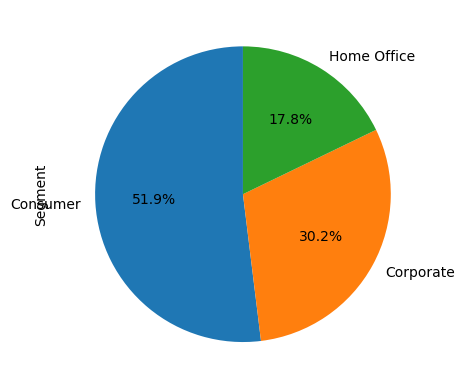

In [32]:
SampleSuperstore_data_seg.plot.pie(autopct="%1.1f%%",startangle=90)
plt.show()
# insight - Consumer Segment has the most products being sold

In [33]:
# with respect to segments -
# Analysis associated with Prodit, Discount and Sales -

SampleSuperstore_data_segm=SampleSuperstore_data.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
SampleSuperstore_data_segm


,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


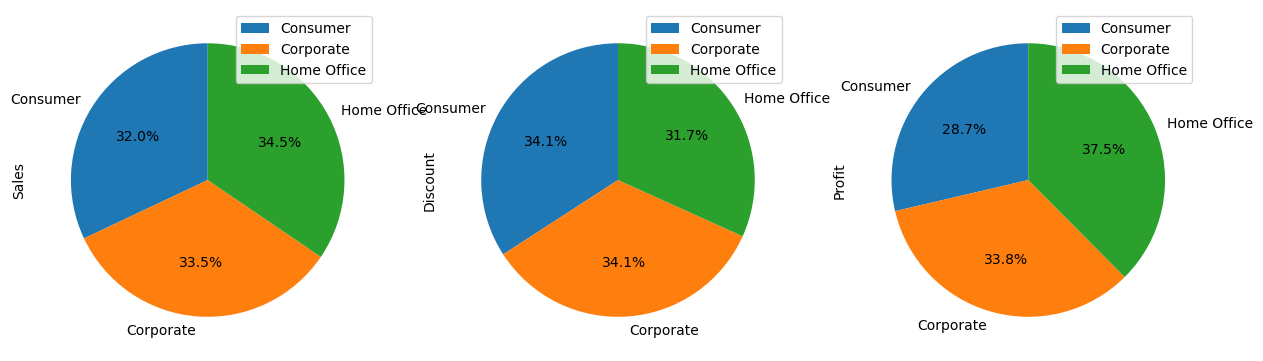

In [34]:
SampleSuperstore_data_segm.plot.pie(subplots=True,figsize=(15,20),autopct="%1.1f%%",startangle=90)
plt.show()
# Most sales happened in Home Office
# Most Discount was given in a tie between Consumer and Corporate

In [35]:
# with respect to Region -

region=SampleSuperstore_data['Region'].value_counts().sort_index()
region

Central    2319
East       2845
South      1620
West       3193
Name: Region, dtype: int64

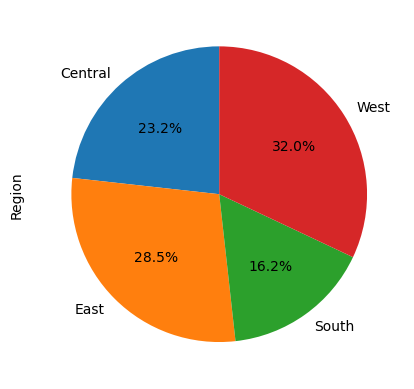

In [36]:
region=SampleSuperstore_data['Region'].value_counts().sort_index()
region
region.plot.pie(autopct="%1.1f%%",startangle=90)
plt.show()
#insight - Profit is more in west region and least in central region 
#Discount is provided more in Central region and lease in west region

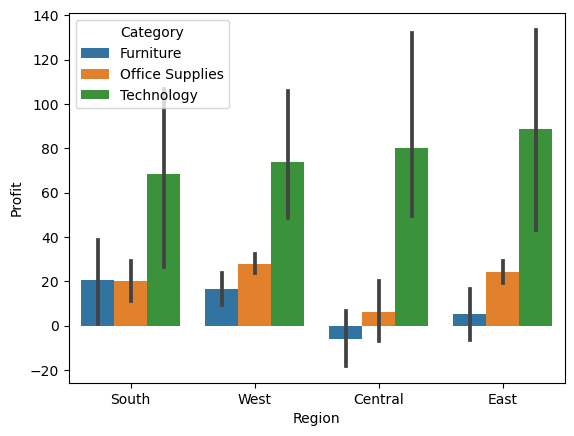

In [37]:
#Analysis with respect to region vs profit, considering for different categories
sns.barplot(data=SampleSuperstore_data,x='Region',y='Profit',hue='Category')
plt.show()


In [38]:
#From the barplot, 
#we can see that Central region has negative profits for Furnitue Category
#while highest Profit is for Category Technology in the East Region

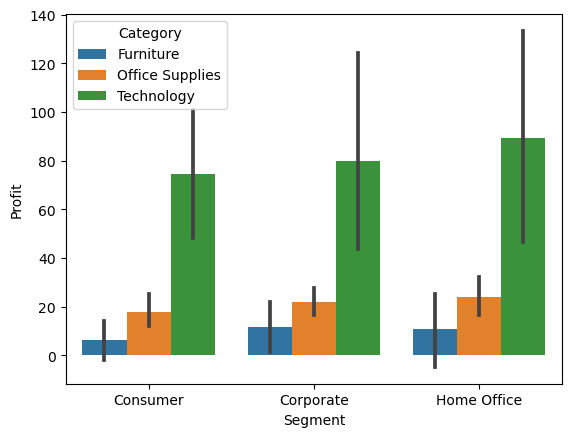

In [39]:
#Analysis with respect to Segment vs profit, considering for different categories

sns.barplot(data=SampleSuperstore_data,x='Segment',y='Profit',hue='Category')
plt.show()


In [40]:
#From the barplot, 
#we can see that Home Office Segment has max profits for Technology Category
#while least of all is the Furniture Category Technology in the East Region

In [41]:
# With respect to State
state=SampleSuperstore_data['State'].value_counts()
print("Average Sales in a State",round(state.mean()))


Average Sales in a State 204


In [42]:
data_state=SampleSuperstore_data.groupby(['State'])[['Sales','Discount','Profit']].mean()
data_state=data_state.sort_values('Profit',ascending=False)
data_state.head(10)

,Sales,Discount,Profit
State,,,
Vermont,811.760909,0.000000,204.088936
Rhode Island,404.070643,0.021429,130.100523
Indiana,359.431946,0.000000,123.375411
Montana,372.623467,0.066667,122.221900
Minnesota,335.541011,0.000000,121.608847
District of Columbia,286.502000,0.000000,105.958930
Delaware,285.948635,0.006250,103.930988
Wyoming,1603.136000,0.200000,100.196000
Missouri,336.441667,0.000000,97.518341


In [43]:
# With respect to Sub-category
SampleSuperstore_data_subcateg=SampleSuperstore_data['Sub-Category'].value_counts().sort_index()
SampleSuperstore_data_subcateg


Accessories     775
Appliances      466
Art             795
Binders        1522
Bookcases       228
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     956
Labels          363
Machines        115
Paper          1359
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub-Category, dtype: int64

In [44]:
_SampleSuperstore_data_subcateg=SampleSuperstore_data.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean().sort_values(by="Sales")
_SampleSuperstore_data_subcateg


,Sales,Discount,Profit
Sub-Category,,,
Fasteners,13.936774,0.082028,4.375660
Art,34.096896,0.074969,8.207059
Labels,34.283504,0.068871,15.224193
Paper,57.560075,0.074908,24.977365
Envelopes,64.867724,0.080315,27.418019
Furnishings,95.902745,0.138494,13.653476
Binders,133.645972,0.372011,19.860710
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758


In [45]:
# With respect to Quantity
quant=SampleSuperstore_data['Quantity'].value_counts().sort_values(ascending=False)
quant

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [46]:
data_quant=SampleSuperstore_data.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
data_quant


,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.377982,0.154844,16.027769
3,175.630896,0.153321,23.720306
4,272.779827,0.158373,37.227971
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


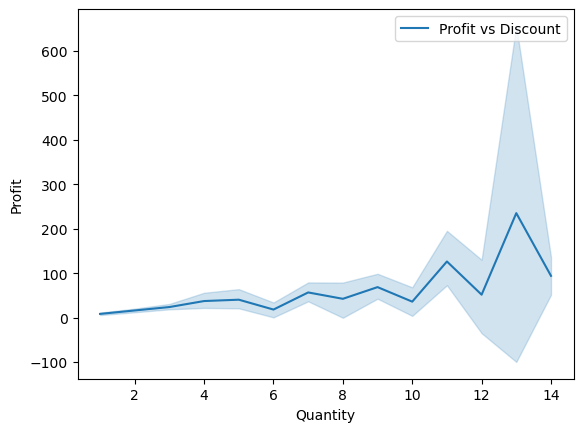

In [47]:
sns.lineplot(x='Quantity',y='Profit',data=SampleSuperstore_data,label="Profit vs Discount")
plt.show()
# insight - profit increase with quantity

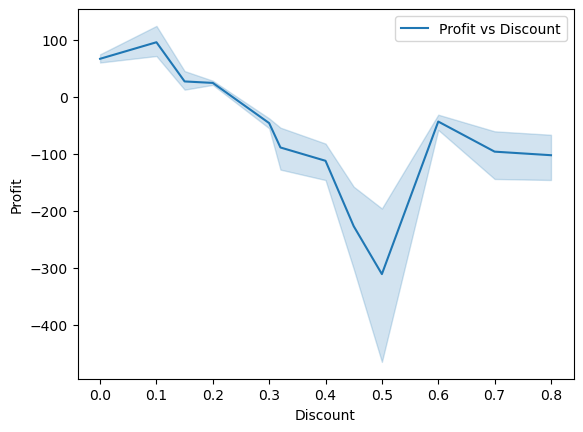

In [48]:
sns.lineplot(x='Discount',y='Profit',data=SampleSuperstore_data,label="Profit vs Discount")
plt.show()
# insight - profit decreases with discount

Conclusion -   

1.Data contains 9994 records with 13 features.   
2.Data set is about country USA   
3.There were no null values present but 17 duplicate records were present    
4.Outliers were present in the dataset    
5.Profit and discount have negative correlation    
6.Profit and sales have negative correlation   
7.State with highest Sales and Profit is Vermont and gives 0 discount, maybe look for a midway to get more customers + discounts.   
8.Quantity is the factor that tells as quantity increases, it becomes directly proportional to Profit, with max quantity as   13 sold, with max sales and profit   Maybe indivualise and maximise profits for comparitively larger quantity of products   which are been bought.
9.Profit decreases with discount, i.e. they are inversely proportional. Try to set the values to maximise Profits. 
10.Copiers subcategory has max sales   
11.Consumer Segment has the most products being sold
12.Technology Category has max profits

In this manner there are many insights, from which based on the Problem statement, the Analysis can be done to obatin a suitable Solution.